# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from matplotlib.colors import ListedColormap


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)

In [56]:

file_path = 'AA_mintafeladat.csv'  
df_temp = pd.read_csv("AA_mintafeladat.csv", encoding="iso-8859-2", sep=";")
missing_count = df_temp.isnull().any(axis=1).sum()
print(f"Rows with at least one missing value: {missing_count}")
print(missing_count/len(df_temp))

Rows with at least one missing value: 10452
0.1652176662135247


In [3]:
df = pd.read_csv("AA_mintafeladat.csv", encoding="iso-8859-2", sep=";")

In [4]:
# ['Key', 'Képzés jogviszony kezdete', 'Modulkód', 'KépzésStátusz', 'Tagozat', 'Képzési szint', 'Félév', 'Pénzügyi státusz', 'FélévesStátusz', 'Nem', 'Születési dátum', 'Irányítószám', 'FélévSorszám', 'Aktív félévek', 'Féléven felvett kredit', 'Féléven kumulált felvett kredit', 'Féléven teljesített kredit', 'Féléven kumulált teljesített kredit', 'Átlag', 'Kumulált átlag']
df.columns = ['Key', 'start_of_study', 'modul_code', 'study_status', 'day_or_night', 'level_of_degree', 'semester_date', 'financial_status', 'semester_status', 'sex', 'date_of_birth', 'post_code', 'semester_num', 'active_semesters', 'taken_credit', 'cum_taken_credit', 'comp_credits', 'cum_comp_credits', 'avg', 'cumulated_avg']
display(df.head(6))

,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,semester_date,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg
0,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),2010.11.01,Államilag finanszírozott,Aktív,Nő,dec.91,1126,1,7.0000,33.0000,33.0000,33.0000,33.0000,"3,64","3,64"
1,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),2010.11.02,Államilag finanszírozott,Aktív,Nő,dec.91,1126,2,7.0000,31.0000,64.0000,31.0000,64.0000,"4,71","4,16"
2,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),2011.12.01,Államilag finanszírozott,Aktív,Nő,dec.91,1126,3,7.0000,30.0000,94.0000,30.0000,94.0000,"4,27","4,19"
3,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),2011.12.02,Államilag finanszírozott,Aktív,Nő,dec.91,1126,4,7.0000,31.0000,125.0000,31.0000,125.0000,"4,06","4,16"
4,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),2012/13/1,Államilag finanszírozott,Aktív,Nő,dec.91,1126,5,7.0000,31.0000,156.0000,31.0000,156.0000,"4,16","4,16"
5,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),2012/13/2,Államilag finanszírozott,Aktív,Nő,dec.91,1126,6,7.0000,20.0000,176.0000,20.0000,176.0000,"4,7","4,22"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63262 entries, 0 to 63261
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Key               63262 non-null  int64  
 1   start_of_study    63262 non-null  object 
 2   modul_code        63262 non-null  object 
 3   study_status      63262 non-null  object 
 4   day_or_night      63262 non-null  object 
 5   level_of_degree   63262 non-null  object 
 6   semester_date     63262 non-null  object 
 7   financial_status  63262 non-null  object 
 8   semester_status   63262 non-null  object 
 9   sex               63262 non-null  object 
 10  date_of_birth     63262 non-null  object 
 11  post_code         63233 non-null  object 
 12  semester_num      63262 non-null  int64  
 13  active_semesters  63252 non-null  float64
 14  taken_credit      60409 non-null  float64
 15  cum_taken_credit  52832 non-null  float64
 16  comp_credits      52836 non-null  float6

In [6]:
# # semester numbers are sometimes out of order
# # the semester_num seems correct based on cumulated values, but the dates keep jumping back 
# ## overall most likely semester date is off --> I'll drop this, as it does not add new information anyway
# # PROBLEMATIC STUDENTS: 43 - where


pattern1 = r"(?P<start_year>\d{4})[/-](?P<end_suffix>\d{2})[/-](?P<semester>\d)"
pattern2 = r"(?P<start_year>\d{4})[.](?P<end_suffix>\d{2})[.](?P<semester>\d{2})"

# First try pattern1
extracted = df["semester_date"].astype(str).str.extract(pattern1)

# Fill missing rows from pattern2
missing = extracted['start_year'].isna()
extracted2 = df.loc[missing, "semester_date"].astype(str).str.extract(pattern2)
extracted.loc[missing] = extracted2

# Build academic_year and semester_number
extracted['start_year'] = extracted['start_year'].astype(float).astype('Int64')
extracted['end_suffix'] = extracted['end_suffix'].astype(float).astype('Int64')
extracted['semester'] = extracted['semester'].astype(float).astype('Int64')

extracted['academic_year'] = extracted['start_year'].astype(str) + "-" + (2000 + extracted['end_suffix']).astype(str)
extracted['semester_number'] = extracted['semester']

# Assign back to original DataFrame
df[["academic_year", "semester_number"]] = extracted[["academic_year", "semester_number"]]
# df.head(45)


df = df.drop(["semester_date"], axis=1)

In [7]:
# # start dealing with date and numerical values
# first date of birth:

month_map = {
    "jan.": 1, "febr.": 2, "márc.": 3, "ápr.": 4, "máj.": 5, "jún.": 6,
    "júl.": 7, "aug.": 8, "szept.": 9, "okt.": 10, "nov.": 11, "dec.": 12
}

def parse_birthday(s):
    try:
        for mon in month_map:
            if s.startswith(mon):
                month = month_map[mon]
                year = int(s.replace(mon, ''))
                year += 1900 if year > 25 else 2000
                return datetime(year, month, 1)
    except:
        return pd.NaT  

df["date_of_birth"] = df["date_of_birth"].apply(parse_birthday)
df.head(5)



,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
0,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,1,7.0000,33.0000,33.0000,33.0000,33.0000,"3,64","3,64",2010-2011,1
1,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,2,7.0000,31.0000,64.0000,31.0000,64.0000,"4,71","4,16",2010-2011,2
2,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,3,7.0000,30.0000,94.0000,30.0000,94.0000,"4,27","4,19",2011-2012,1
3,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,4,7.0000,31.0000,125.0000,31.0000,125.0000,"4,06","4,16",2011-2012,2
4,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,5,7.0000,31.0000,156.0000,31.0000,156.0000,"4,16","4,16",2012-2013,1


In [8]:
# # Convert string numbers to actual numeric type
df["avg"] = pd.to_numeric(df["avg"].str.replace(',', '.', regex=False), errors='coerce')
df["cumulated_avg"] = pd.to_numeric(df["cumulated_avg"].str.replace(',', '.', regex=False), errors='coerce')

In [9]:
# preliminary data analysis
print(f"shape: {df.shape}")

print("\ninformation:")
print(df.info())

print("\ndescribe:")
print(df.describe())

print("\nunique values:")
print(df.nunique())

shape: (63262, 21)

information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63262 entries, 0 to 63261
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Key               63262 non-null  int64         
 1   start_of_study    63262 non-null  object        
 2   modul_code        63262 non-null  object        
 3   study_status      63262 non-null  object        
 4   day_or_night      63262 non-null  object        
 5   level_of_degree   63262 non-null  object        
 6   financial_status  63262 non-null  object        
 7   semester_status   63262 non-null  object        
 8   sex               63262 non-null  object        
 9   date_of_birth     63262 non-null  datetime64[ns]
 10  post_code         63233 non-null  object        
 11  semester_num      63262 non-null  int64         
 12  active_semesters  63252 non-null  float64       
 13  taken_credit      60409 non-null  float64  

one degree (so one teaching point) will be dedtermined by ['Key', 'modul_code', 'study_status',  'active_semesters']

active semesters are determined as semester_status = ['Aktív' 'Aktív vendéghallgató' ''Felvett' 'Abszolvált' 'Záróvizsgára vár' 'Szakváltoztató' 'Nem beszámító aktív' 'Részismeretes(végzett)' 'Képzés váltó']

so what i want to do for missing values:
* taken_credit - if Nan 
   * if the studentt is active in last semester of observation period and the taken_credit is missing due to that --> substitue with median from previous if exists
   * else --> set to 0
* com_credit - if Nan 
   * if the studentt is active in last semester of observation period and the taken_credit is missing due to that --> substitue with median from previous if exists
   * else --> set to 0
* cum_take 
   * if Nan and it is the first semester of a degree or at least the first in observed period (so lowest semester_num in sequence of semester_num) then taken_credit == cum_credit
   * if Nan and exists previous semester with cum value for that --> then cum_credit = taken_credit (in that semster) + previous cum_credit
* cum_comp
   * if Nan and it is the first semester of a degree or at least the first in observed period (so lowest semester_num in sequence of semester_num) then comp_credit == cum_comp
   * if Nan and exists previous semester with cum value for that --> then cum_comp= comp_credit (in that semster) + previous cum_comp
         calculate the actual cumulative value
* active_semester - if NaN cumulate active semesters withtin same degree
* post_code - resample from distribution


problematic columns:
* if the semester_num and academic year+semester_number are inconsistent  --> rearrange the academic year+semester_number within the degre based on semester_num
* active semester number should be the same for one degree!!

In [10]:
df.loc[df["taken_credit"] < 0, "taken_credit"] = 0

In [11]:
missing_keys = df[df["active_semesters"].isna()]["Key"].unique()
df["active_semesters"] = df["active_semesters"].fillna(1)
# def fill_active_semesters(group):
#     group = group.sort_values('semester_num').copy()
#     active_mask = group['semester_status'].isin(['Aktív', 'Aktív vendéghallgató', 'Felvett'])
#     group['active_semesters'] = active_mask.cumsum().astype('float')
#     return group

# # df = (df.sort_values(['Key', 'modul_code', 'study_status', 'active_semesters', 'semester_num']).groupby(['Key', 'modul_code', 'study_status', 'active_semesters'], group_keys=False).apply(fill_active_semesters))

# df = (df.sort_values(['Key', 'modul_code', 'study_status', 'semester_num']).groupby(['Key', 'modul_code', 'study_status'], group_keys=False).apply(fill_active_semesters).reset_index(drop=True))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63262 entries, 0 to 63261
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Key               63262 non-null  int64         
 1   start_of_study    63262 non-null  object        
 2   modul_code        63262 non-null  object        
 3   study_status      63262 non-null  object        
 4   day_or_night      63262 non-null  object        
 5   level_of_degree   63262 non-null  object        
 6   financial_status  63262 non-null  object        
 7   semester_status   63262 non-null  object        
 8   sex               63262 non-null  object        
 9   date_of_birth     63262 non-null  datetime64[ns]
 10  post_code         63233 non-null  object        
 11  semester_num      63262 non-null  int64         
 12  active_semesters  63262 non-null  float64       
 13  taken_credit      60409 non-null  float64       
 14  cum_taken_credit  5283

In [13]:
df[df["Key"].isin(missing_keys)]

,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
201,44,2008.09.15,3BNKEMN,Részismeretes(végzett),Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív vendéghallgató,Nő,1985-12-01,1092,1,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2008-2009,1
7000,1413,2008.09.15,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív vendéghallgató,Férfi,1984-10-01,6708,1,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,2008-2009,1
9254,1843,2008.09.15,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív vendéghallgató,Nő,1984-02-01,85057,1,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,2008-2009,1
20713,4180,2008.09.15,3BNKEMN,Részismeretes(végzett),Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív vendéghallgató,Férfi,1987-01-01,9999,1,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,2008-2009,1
22008,4434,2008.09.15,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív vendéghallgató,Férfi,1986-01-01,9999,1,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,2008-2009,1
28702,5883,2010.09.16,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1991-10-01,1088,1,7.0000,31.0000,31.0000,25.0000,25.0000,2.6000,2.6000,2010-2011,1
28703,5883,2010.09.16,ETLEMBSC,Törölt,Levelező,alapképzés (BA/BSc),Költségtérítéses,Felvett,Nő,1991-10-01,1088,1,1.0000,0.0000,NaN,NaN,NaN,NaN,NaN,2010-2011,1
28704,5883,2010.09.16,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1991-10-01,1088,2,7.0000,35.0000,66.0000,23.0000,48.0000,3.4800,3.0200,2010-2011,2
28705,5883,2010.09.16,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-10-01,1088,3,7.0000,22.0000,88.0000,22.0000,70.0000,3.8600,3.2900,2011-2012,1
28706,5883,2010.09.16,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-10-01,1088,4,7.0000,35.0000,123.0000,35.0000,105.0000,2.6000,3.0600,2011-2012,2


In [14]:
['Aktív', 'Felvett', 'Aktív vendéghallgató', 'Abszolvált']

def add_credit(group):
   group = group.sort_values('semester_num').copy()
  
   # completion rate from last available cumulative values
   last_cum_taken = group['cum_taken_credit'].dropna().iloc[-1] if len(group['cum_taken_credit'].dropna()) > 0 else 0
   last_cum_comp = group['cum_comp_credits'].dropna().iloc[-1] if len(group['cum_comp_credits'].dropna()) > 0 else 0
   
   typical_taken = int(group['taken_credit'].dropna().median()) if len(group['taken_credit'].dropna()) > 0 else 0
   completion_rate = (last_cum_comp / last_cum_taken) if last_cum_taken > 0 else 0.8
  
   for i in range(len(group)):
       status = group.iloc[i]['semester_status']
      
       if pd.isna(group.iloc[i]['taken_credit']):
           if status in ['Aktív', 'Aktív vendéghallgató', 'Felvett', 'Abszolvált']:
               group.iloc[i, group.columns.get_loc('taken_credit')] = typical_taken
           else:
               group.iloc[i, group.columns.get_loc('taken_credit')] = 0
      
       if pd.isna(group.iloc[i]['comp_credits']):
           taken = group.iloc[i]['taken_credit']
           if status in ['Aktív', 'Aktív vendéghallgató', 'Felvett', 'Abszolvált']:
               group.iloc[i, group.columns.get_loc('comp_credits')] = int(taken * completion_rate)
           # not giving benefit of doubt to others sorry    
           else:
               group.iloc[i, group.columns.get_loc('comp_credits')] = 0
  
   return group

df = (df.sort_values(['Key', 'modul_code', 'study_status', 'active_semesters', 'semester_num']).groupby(['Key', 'modul_code', 'study_status', 'active_semesters'], group_keys=False).apply(add_credit))

C:\Users\LiliStájer\AppData\Local\Temp\ipykernel_36560\1549561938.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = (df.sort_values(['Key', 'modul_code', 'study_status', 'active_semesters', 'semester_num']).groupby(['Key', 'modul_code', 'study_status', 'active_semesters'], group_keys=False).apply(add_credit))


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63262 entries, 0 to 63261
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Key               63262 non-null  int64         
 1   start_of_study    63262 non-null  object        
 2   modul_code        63262 non-null  object        
 3   study_status      63262 non-null  object        
 4   day_or_night      63262 non-null  object        
 5   level_of_degree   63262 non-null  object        
 6   financial_status  63262 non-null  object        
 7   semester_status   63262 non-null  object        
 8   sex               63262 non-null  object        
 9   date_of_birth     63262 non-null  datetime64[ns]
 10  post_code         63233 non-null  object        
 11  semester_num      63262 non-null  int64         
 12  active_semesters  63262 non-null  float64       
 13  taken_credit      63262 non-null  float64       
 14  cum_taken_credit  52832 non

In [16]:
df.head(50)

,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
0,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,1,7.0000,33.0000,33.0000,33.0000,33.0000,3.6400,3.6400,2010-2011,1
1,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,2,7.0000,31.0000,64.0000,31.0000,64.0000,4.7100,4.1600,2010-2011,2
2,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,3,7.0000,30.0000,94.0000,30.0000,94.0000,4.2700,4.1900,2011-2012,1
3,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,4,7.0000,31.0000,125.0000,31.0000,125.0000,4.0600,4.1600,2011-2012,2
4,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,5,7.0000,31.0000,156.0000,31.0000,156.0000,4.1600,4.1600,2012-2013,1
5,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,6,7.0000,20.0000,176.0000,20.0000,176.0000,4.7000,4.2200,2012-2013,2
6,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,7,7.0000,30.0000,NaN,30.0000,NaN,NaN,NaN,2013-2014,1
7,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1990-02-01,4031,1,7.0000,33.0000,33.0000,33.0000,33.0000,2.8800,2.8800,2008-2009,1
8,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1990-02-01,4031,2,7.0000,31.0000,64.0000,31.0000,64.0000,3.9400,3.3900,2008-2009,2
9,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1990-02-01,4031,3,7.0000,32.0000,96.0000,32.0000,96.0000,3.7500,3.5100,2009-2010,1


In [17]:
# # Fill cum_taken_credit and
# def fill_cumulative_credits(group):
#     group = group.sort_values('semester_num')
    
#     for i in range(len(group)):
#         if pd.isna(group.iloc[i]['cum_taken_credit']):
#             if i == 0:  # First semester in sequence not necesserily first tho
#                 group.iloc[i, group.columns.get_loc('cum_taken_credit')] = group.iloc[i]['taken_credit']
#             else:
#                 prev_cum = group.iloc[i-1]['cum_taken_credit']
#                 if not pd.isna(prev_cum):
#                     group.iloc[i, group.columns.get_loc('cum_taken_credit')] = prev_cum + group.iloc[i]['taken_credit']
    
#     for i in range(len(group)):
#         if pd.isna(group.iloc[i]['cum_comp_credits']):
#             if i == 0:  # First semester
#                 group.iloc[i, group.columns.get_loc('cum_comp_credits')] = group.iloc[i]['comp_credits']
#             else:
#                 prev_cum = group.iloc[i-1]['cum_comp_credits']
#                 if not pd.isna(prev_cum):
#                     group.iloc[i, group.columns.get_loc('cum_comp_credits')] = prev_cum + group.iloc[i]['comp_credits']
    
#     return group

# # Apply to each degree combination
# df = df.groupby(['Key', 'modul_code', 'study_status',  'active_semesters']).apply(fill_cumulative_credits).reset_index(drop=True)

def fill_cumulative_credits(group):
    group = group.sort_values('semester_num').copy()
    
    group['cum_taken_credit'] = group['taken_credit'].fillna(0).cumsum()
    group.loc[group['taken_credit'].isna(), 'cum_taken_credit'] = np.nan  
    
    group['cum_comp_credits'] = group['comp_credits'].fillna(0).cumsum()
    group.loc[group['comp_credits'].isna(), 'cum_comp_credits'] = np.nan  
    
    return group

df = (df.sort_values(['Key', 'modul_code', 'study_status', 'active_semesters', 'semester_num']).groupby(['Key', 'modul_code', 'study_status', 'active_semesters'], group_keys=False).apply(fill_cumulative_credits))
# df = df.groupby(['Key', 'modul_code', 'study_status',  'active_semesters']).apply(fill_cumulative_credits).reset_index(drop=True)


C:\Users\LiliStájer\AppData\Local\Temp\ipykernel_36560\2277451692.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = (df.sort_values(['Key', 'modul_code', 'study_status', 'active_semesters', 'semester_num']).groupby(['Key', 'modul_code', 'study_status', 'active_semesters'], group_keys=False).apply(fill_cumulative_credits))


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63262 entries, 0 to 63261
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Key               63262 non-null  int64         
 1   start_of_study    63262 non-null  object        
 2   modul_code        63262 non-null  object        
 3   study_status      63262 non-null  object        
 4   day_or_night      63262 non-null  object        
 5   level_of_degree   63262 non-null  object        
 6   financial_status  63262 non-null  object        
 7   semester_status   63262 non-null  object        
 8   sex               63262 non-null  object        
 9   date_of_birth     63262 non-null  datetime64[ns]
 10  post_code         63233 non-null  object        
 11  semester_num      63262 non-null  int64         
 12  active_semesters  63262 non-null  float64       
 13  taken_credit      63262 non-null  float64       
 14  cum_taken_credit  63262 non

In [19]:
df.head(50)

,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
0,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,1,7.0000,33.0000,33.0000,33.0000,33.0000,3.6400,3.6400,2010-2011,1
1,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,2,7.0000,31.0000,64.0000,31.0000,64.0000,4.7100,4.1600,2010-2011,2
2,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,3,7.0000,30.0000,94.0000,30.0000,94.0000,4.2700,4.1900,2011-2012,1
3,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,4,7.0000,31.0000,125.0000,31.0000,125.0000,4.0600,4.1600,2011-2012,2
4,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,5,7.0000,31.0000,156.0000,31.0000,156.0000,4.1600,4.1600,2012-2013,1
5,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,6,7.0000,20.0000,176.0000,20.0000,176.0000,4.7000,4.2200,2012-2013,2
6,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,7,7.0000,30.0000,206.0000,30.0000,206.0000,NaN,NaN,2013-2014,1
7,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1990-02-01,4031,1,7.0000,33.0000,33.0000,33.0000,33.0000,2.8800,2.8800,2008-2009,1
8,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1990-02-01,4031,2,7.0000,31.0000,64.0000,31.0000,64.0000,3.9400,3.3900,2008-2009,2
9,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1990-02-01,4031,3,7.0000,32.0000,96.0000,32.0000,96.0000,3.7500,3.5100,2009-2010,1


In [20]:
print("MISSING POST_CODE")
missing_pc = df[df['post_code'].isnull()]["Key"].tolist()
print(missing_pc)
# print(df[df["Key"].isin(missing_pc)])
# no extra information from other rows, so will leave for now. I might later add randomly based on distribution

valid_postcodes = df['post_code'].dropna()
missing_postcode_mask = df['post_code'].isnull()
n_missing = missing_postcode_mask.sum()


# Resample from existing distribution
sampled_postcodes = np.random.choice(valid_postcodes, size=n_missing, replace=True)
df.loc[missing_postcode_mask, 'post_code'] = sampled_postcodes
print(f"{n_missing} missing postcodes added with resampling from distribution")

MISSING POST_CODE
[2322, 3476, 3700, 5205, 5321, 5517, 5729, 7408, 7528, 7528, 7528, 7528, 7528, 7997, 8315, 8979, 9000, 9040, 9040, 9040, 9187, 9994, 9994, 10730, 12027, 12363, 12797, 12797, 12797]
29 missing postcodes added with resampling from distribution


In [21]:
df[df["Key"].isin(missing_pc)]

,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
11618,2322,2008.02.04,3BNKEMN,Részismeretes(végzett),Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Részismeretes(végzett),Nő,1985-02-01,2094,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2007-2008,2
17207,3476,2008.02.04,3BNKEMN,Részismeretes(végzett),Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Részismeretes(végzett),Férfi,1985-07-01,2600,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2007-2008,2
18333,3700,2008.02.04,3BNKEMN,Részismeretes(végzett),Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Részismeretes(végzett),Férfi,1986-01-01,6050,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2007-2008,2
25590,5205,2013.09.05,7BNNEMZ,Aktív,Nappali,alapképzés (BA/BSc),A1 kategóriás külföldi ösztöndíjas,Aktív,Férfi,1990-10-01,2092,1,1.0000,31.0000,31.0000,24.0000,24.0000,NaN,NaN,2013-2014,1
26123,5321,2008.02.04,3BNKEMN,Részismeretes(végzett),Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Részismeretes(végzett),Férfi,1985-10-01,1112,1,0.0000,5.0000,5.0000,0.0000,0.0000,0.0000,0.0000,2007-2008,2
27024,5517,2008.02.04,3BNKEMN,Részismeretes(végzett),Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Részismeretes(végzett),Nő,1985-02-01,5525,1,0.0000,5.0000,5.0000,0.0000,0.0000,0.0000,0.0000,2007-2008,2
28026,5729,2009.04.20,3MNKERT,Részismeretes(végzett),Nappali,mesterképzés (MA/MSc),Államilag támogatott (vendéghallgató),Aktív vendéghallgató,Férfi,1974-01-01,1162,1,0.0000,9.0000,9.0000,7.0000,7.0000,NaN,NaN,2008-2009,2
36260,7408,2010.05.01,3BNKEMN,Részismeretes(végzett),Nappali,alapképzés (BA/BSc),Miniszteri ösztöndíjas,Aktív,Nő,1988-02-01,1192,1,1.0000,0.0000,0.0000,0.0000,0.0000,NaN,NaN,2009-2010,2
36846,7528,2008.09.11,2MNVESZ,Abszolvált,Nappali,mesterképzés (MA/MSc),Miniszteri ösztöndíjas,Aktív,Nő,1986-04-01,2091,1,5.0000,29.0000,29.0000,25.0000,25.0000,2.2000,2.2000,2008-2009,1
36847,7528,2008.09.11,2MNVESZ,Abszolvált,Nappali,mesterképzés (MA/MSc),Miniszteri ösztöndíjas,Aktív,Nő,1986-04-01,2823,2,5.0000,42.0000,71.0000,30.0000,55.0000,3.1700,2.7300,2008-2009,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63262 entries, 0 to 63261
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Key               63262 non-null  int64         
 1   start_of_study    63262 non-null  object        
 2   modul_code        63262 non-null  object        
 3   study_status      63262 non-null  object        
 4   day_or_night      63262 non-null  object        
 5   level_of_degree   63262 non-null  object        
 6   financial_status  63262 non-null  object        
 7   semester_status   63262 non-null  object        
 8   sex               63262 non-null  object        
 9   date_of_birth     63262 non-null  datetime64[ns]
 10  post_code         63262 non-null  object        
 11  semester_num      63262 non-null  int64         
 12  active_semesters  63262 non-null  float64       
 13  taken_credit      63262 non-null  float64       
 14  cum_taken_credit  63262 non

In [23]:
def fill_averages(group):
   group = group.sort_values('semester_num').copy()
  
   # Set to 0 if first semester and no completed credits
   if pd.isna(group.iloc[0]['avg']) and group.iloc[0]['comp_credits'] == 0:
       group.iloc[0, group.columns.get_loc('avg')] = 0
  
   # Forward-fill missing semester averages, then fill remaining with 0
   group['avg'] = group['avg'].ffill().fillna(0)
  
   # Calculate true cumulative average (credit-weighted)
   for i in range(len(group)):
       if pd.isna(group.iloc[i]['cumulated_avg']):
           credits_so_far = group.iloc[:i+1]['comp_credits']
           grades_so_far = group.iloc[:i+1]['avg']
          
           valid_mask = ~grades_so_far.isna() & (credits_so_far > 0)
           if valid_mask.sum() > 0:
               weighted_avg = (grades_so_far[valid_mask] * credits_so_far[valid_mask]).sum() / credits_so_far[valid_mask].sum()
               group.iloc[i, group.columns.get_loc('cumulated_avg')] = round(weighted_avg, 2)
           else:
               group.iloc[i, group.columns.get_loc('cumulated_avg')] = 0
  
   return group

df = (df.sort_values(['Key', 'modul_code', 'study_status', 'active_semesters', 'semester_num']).groupby(['Key', 'modul_code', 'study_status', 'active_semesters'], group_keys=False).apply(fill_averages).reset_index(drop=True))


C:\Users\LiliStájer\AppData\Local\Temp\ipykernel_36560\3150325300.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = (df.sort_values(['Key', 'modul_code', 'study_status', 'active_semesters', 'semester_num']).groupby(['Key', 'modul_code', 'study_status', 'active_semesters'], group_keys=False).apply(fill_averages).reset_index(drop=True))


In [24]:
df.head(50)

,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
0,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,1,7.0000,33.0000,33.0000,33.0000,33.0000,3.6400,3.6400,2010-2011,1
1,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,2,7.0000,31.0000,64.0000,31.0000,64.0000,4.7100,4.1600,2010-2011,2
2,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,3,7.0000,30.0000,94.0000,30.0000,94.0000,4.2700,4.1900,2011-2012,1
3,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,4,7.0000,31.0000,125.0000,31.0000,125.0000,4.0600,4.1600,2011-2012,2
4,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,5,7.0000,31.0000,156.0000,31.0000,156.0000,4.1600,4.1600,2012-2013,1
5,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,6,7.0000,20.0000,176.0000,20.0000,176.0000,4.7000,4.2200,2012-2013,2
6,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,7,7.0000,30.0000,206.0000,30.0000,206.0000,4.7000,4.2900,2013-2014,1
7,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1990-02-01,4031,1,7.0000,33.0000,33.0000,33.0000,33.0000,2.8800,2.8800,2008-2009,1
8,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1990-02-01,4031,2,7.0000,31.0000,64.0000,31.0000,64.0000,3.9400,3.3900,2008-2009,2
9,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1990-02-01,4031,3,7.0000,32.0000,96.0000,32.0000,96.0000,3.7500,3.5100,2009-2010,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63262 entries, 0 to 63261
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Key               63262 non-null  int64         
 1   start_of_study    63262 non-null  object        
 2   modul_code        63262 non-null  object        
 3   study_status      63262 non-null  object        
 4   day_or_night      63262 non-null  object        
 5   level_of_degree   63262 non-null  object        
 6   financial_status  63262 non-null  object        
 7   semester_status   63262 non-null  object        
 8   sex               63262 non-null  object        
 9   date_of_birth     63262 non-null  datetime64[ns]
 10  post_code         63262 non-null  object        
 11  semester_num      63262 non-null  int64         
 12  active_semesters  63262 non-null  float64       
 13  taken_credit      63262 non-null  float64       
 14  cum_taken_credit  6326

In [26]:
# def check_academic_year_order(group):
#     group = group.sort_values('semester_num')
#     has_violation = False
    
#     for i in range(1, len(group)):
#         if pd.notna(group.iloc[i]['academic_year']) and '-' in str(group.iloc[i]['academic_year']):
#             start_year = int(str(group.iloc[i]['academic_year']).split('-')[0])
#             year_sem = start_year * 10 + group.iloc[i]['semester_number']
            
#             prev_start_year = int(str(group.iloc[i-1]['academic_year']).split('-')[0])
#             prev_year_sem = prev_start_year * 10 + group.iloc[i-1]['semester_number']
            
#             if year_sem < prev_year_sem:
#                 has_violation = True
#                 break
    
#     return has_violation


# violation_groups = df.groupby(['Key', 'modul_code', 'study_status', 'active_semesters']).apply(check_academic_year_order)
# violation_group_keys = violation_groups[violation_groups].index

# # Get all rows from violating groups
# violation_rows = df.set_index(['Key', 'modul_code', 'study_status', 'active_semesters']).loc[violation_group_keys].reset_index()

# violation_rows.to_csv('academic_year_order_violations.csv', index=False)
# print(f"Found {len(violation_rows)} rows with academic year order violations")


In [27]:
df[df["Key"]==138]


,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
626,138,2013.09.16,ETLEMBSC,Aktív,Levelező,alapképzés (BA/BSc),Állami ösztöndíjas,Aktív,Nő,1986-08-01,8429,1,1.0000,151.0000,151.0000,120.0000,120.0000,0.0000,0.0000,2013-2014,1
627,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1986-08-01,8429,1,7.0000,82.0000,82.0000,73.0000,73.0000,0.0000,0.0000,2008-2009,1
628,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1986-08-01,8429,2,7.0000,11.0000,93.0000,0.0000,73.0000,0.0000,0.0000,2008-2009,2
629,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1986-08-01,8429,3,7.0000,17.0000,110.0000,6.0000,79.0000,2.0000,2.0000,2009-2010,1
630,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1986-08-01,8429,4,7.0000,14.0000,124.0000,6.0000,85.0000,2.5000,2.2500,2009-2010,2
631,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Költségtérítéses,Passzív,Nő,1986-08-01,8429,5,7.0000,0.0000,124.0000,0.0000,85.0000,0.0000,2.2500,2010-2011,1
632,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1986-08-01,8429,6,7.0000,23.0000,147.0000,14.0000,99.0000,3.2900,2.8100,2011-2012,1
633,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1986-08-01,8429,7,7.0000,28.0000,175.0000,18.0000,117.0000,2.8900,2.8400,2011-2012,2
634,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1986-08-01,8429,8,7.0000,55.0000,230.0000,34.0000,151.0000,3.7600,3.2400,2012-2013,1
635,138,2008.07.31,ETNEMBSC,Törölt,Nappali,alapképzés (BA/BSc),Költségtérítéses,Passzív,Nő,1986-08-01,8429,9,7.0000,0.0000,230.0000,0.0000,151.0000,0.0000,3.2400,2010-2011,2


In [28]:
def fix_academic_year_semester(group):
   group = group.sort_values('semester_num')
   
   if len(group) > 0:
       # Get existing academic years and semester numbers, sort them chronologically
       existing_data = []
       for _, row in group.iterrows():
           if pd.notna(row['academic_year']) and '-' in str(row['academic_year']):
               year = int(str(row['academic_year']).split('-')[0])
               existing_data.append((year * 10 + row['semester_number'], row['academic_year'], row['semester_number']))
       
       # Sort by chronological order and remove duplicates
       existing_data = sorted(list(set(existing_data)))
       
       if existing_data:
           # Assign sorted academic years/semesters to semester_num order
           for i, row in group.iterrows():
               sem_num = row['semester_num']
               if sem_num <= len(existing_data):
                   _, new_academic_year, new_semester_number = existing_data[sem_num - 1]
                   group.loc[i, 'academic_year'] = new_academic_year
                   group.loc[i, 'semester_number'] = new_semester_number
   
   return group

df = df.groupby(['Key', 'modul_code', 'study_status', 'active_semesters']).apply(fix_academic_year_semester).reset_index(drop=True)
df = df.sort_values(['Key', 'modul_code', 'study_status', 'active_semesters', 'semester_num']).reset_index(drop=True)

C:\Users\LiliStájer\AppData\Local\Temp\ipykernel_36560\3880316659.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Key', 'modul_code', 'study_status', 'active_semesters']).apply(fix_academic_year_semester).reset_index(drop=True)


In [29]:
df[df["Key"]==895]


,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
4507,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Férfi,1985-05-01,2890,1,6.0000,28.0000,28.0000,18.0000,18.0000,3.0000,3.0000,2007-2008,1
4508,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Férfi,1985-05-01,2890,2,6.0000,34.0000,62.0000,17.0000,35.0000,2.7600,2.8900,2007-2008,2
4509,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Férfi,1985-05-01,2890,3,6.0000,37.0000,99.0000,17.0000,52.0000,2.5300,2.7700,2008-2009,1
4510,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Férfi,1985-05-01,2890,4,6.0000,12.0000,111.0000,12.0000,64.0000,2.6700,2.8300,2008-2009,2
4511,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Férfi,1985-05-01,2890,5,6.0000,34.0000,145.0000,7.0000,71.0000,2.0000,2.6800,2009-2010,1
4512,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Férfi,1985-05-01,2890,6,6.0000,23.0000,168.0000,4.0000,75.0000,5.0000,2.8000,2009-2010,2
4513,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Passzív,Férfi,1985-05-01,2890,7,6.0000,0.0000,168.0000,0.0000,75.0000,5.0000,2.8000,2010-2011,1
4514,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Passzív,Férfi,1985-05-01,2890,8,6.0000,0.0000,168.0000,0.0000,75.0000,5.0000,2.8000,2010-2011,2
4515,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Passzív,Férfi,1985-05-01,2890,9,6.0000,0.0000,168.0000,0.0000,75.0000,5.0000,2.8000,2011-2012,1
4516,895,2008.02.02,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Passzív,Férfi,1985-05-01,2890,10,6.0000,0.0000,168.0000,0.0000,75.0000,5.0000,2.8000,2011-2012,2


In [30]:
def validate_credits(group):
    group = group.sort_values('semester_num')
    
    # Check if cumulative taken credits match sum of semester credits
    group['calc_cum_taken'] = group['taken_credit'].fillna(0).cumsum()
    group['taken_credit_valid'] = np.isclose(
        group['cum_taken_credit'].fillna(0), 
        group['calc_cum_taken'], 
        atol=0.1, 
        equal_nan=True
    ) | group['cum_taken_credit'].isna()
    
    # Check if cumulative completed credits match sum of semester credits
    group['calc_cum_comp'] = group['comp_credits'].fillna(0).cumsum()
    group['comp_credit_valid'] = np.isclose(
        group['cum_comp_credits'].fillna(0), 
        group['calc_cum_comp'], 
        atol=0.1, 
        equal_nan=True
    ) | group['cum_comp_credits'].isna()
    
    return group

# Apply validation to each degree
df_validated = df.groupby(['Key', 'modul_code', 'study_status', 'active_semesters']).apply(validate_credits).reset_index(drop=True)

# Summary of validation results
total_records = len(df_validated)
taken_credit_errors = (~df_validated['taken_credit_valid']).sum()
comp_credit_errors = (~df_validated['comp_credit_valid']).sum()

print(f"Total records: {total_records:,}")
print(f"Taken credit validation errors: {taken_credit_errors:,} ({taken_credit_errors/total_records:.2%})")
print(f"Completed credit validation errors: {comp_credit_errors:,} ({comp_credit_errors/total_records:.2%})")

# Show examples of errors
if taken_credit_errors > 0:
    print("\n=== TAKEN CREDIT ERRORS (Sample) ===")
    error_samples = df_validated[~df_validated['taken_credit_valid']].head(10)
    print(error_samples)

if comp_credit_errors > 0:
    print("\n=== COMPLETED CREDIT ERRORS (Sample) ===")
    error_samples = df_validated[~df_validated['comp_credit_valid']].head(10)
    print(error_samples)

# Detailed error analysis by degree
print("\n=== ERROR ANALYSIS BY DEGREE ===")
degree_errors = df_validated.groupby(['Key', 'modul_code']).agg({
    'taken_credit_valid': lambda x: (~x).sum(),
    'comp_credit_valid': lambda x: (~x).sum()
}).reset_index()

degree_errors = degree_errors[(degree_errors['taken_credit_valid'] > 0) | (degree_errors['comp_credit_valid'] > 0)]
print(f"Degrees with credit validation errors: {len(degree_errors)}")

if len(degree_errors) > 0:
    print("\nSample degrees with errors:")
    print(degree_errors.head(10))

C:\Users\LiliStájer\AppData\Local\Temp\ipykernel_36560\2243312582.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_validated = df.groupby(['Key', 'modul_code', 'study_status', 'active_semesters']).apply(validate_credits).reset_index(drop=True)


Total records: 63,262
Taken credit validation errors: 0 (0.00%)
Completed credit validation errors: 0 (0.00%)

=== ERROR ANALYSIS BY DEGREE ===
Degrees with credit validation errors: 0


In [31]:
df.head(50)

,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
0,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,1,7.0000,33.0000,33.0000,33.0000,33.0000,3.6400,3.6400,2010-2011,1
1,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,2,7.0000,31.0000,64.0000,31.0000,64.0000,4.7100,4.1600,2010-2011,2
2,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,3,7.0000,30.0000,94.0000,30.0000,94.0000,4.2700,4.1900,2011-2012,1
3,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,4,7.0000,31.0000,125.0000,31.0000,125.0000,4.0600,4.1600,2011-2012,2
4,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,5,7.0000,31.0000,156.0000,31.0000,156.0000,4.1600,4.1600,2012-2013,1
5,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,6,7.0000,20.0000,176.0000,20.0000,176.0000,4.7000,4.2200,2012-2013,2
6,1,2010.09.10,ETNEMBSC,Aktív,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1991-12-01,1126,7,7.0000,30.0000,206.0000,30.0000,206.0000,4.7000,4.2900,2013-2014,1
7,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Költségtérítéses,Aktív,Nő,1990-02-01,4031,1,7.0000,33.0000,33.0000,33.0000,33.0000,2.8800,2.8800,2008-2009,1
8,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1990-02-01,4031,2,7.0000,31.0000,64.0000,31.0000,64.0000,3.9400,3.3900,2008-2009,2
9,2,2008.09.12,ETNEMBSC,Diplomát szerzett,Nappali,alapképzés (BA/BSc),Államilag finanszírozott,Aktív,Nő,1990-02-01,4031,3,7.0000,32.0000,96.0000,32.0000,96.0000,3.7500,3.5100,2009-2010,1


In [32]:
print("\ninformation:")
print(df.info())



information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63262 entries, 0 to 63261
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Key               63262 non-null  int64         
 1   start_of_study    63262 non-null  object        
 2   modul_code        63262 non-null  object        
 3   study_status      63262 non-null  object        
 4   day_or_night      63262 non-null  object        
 5   level_of_degree   63262 non-null  object        
 6   financial_status  63262 non-null  object        
 7   semester_status   63262 non-null  object        
 8   sex               63262 non-null  object        
 9   date_of_birth     63262 non-null  datetime64[ns]
 10  post_code         63262 non-null  object        
 11  semester_num      63262 non-null  int64         
 12  active_semesters  63262 non-null  float64       
 13  taken_credit      63262 non-null  float64       
 14  cum_take

In [33]:
df.to_csv('AA_mintafeladat_converted.csv', index=False)


In [34]:
## Here I am identifying all keys for one study and then detemining contants throughout a study -->  later I'll make a new df based on these data

# these values determine one "study" point
grouped = df.groupby(['Key', 'modul_code', 'study_status', 'active_semesters'])
# within one study point the following are costant: 
test_cols = ['day_or_night', 'level_of_degree', 'sex', 'date_of_birth', 'post_code']

# # I tested if the above values for the combined keys are constant and they are GOOD
# violations = {}
# for col in test_cols:
#     if col in df.columns:
#         # Check if each group has only one unique value
#         unique_counts = grouped[col].nunique()
#         violations[col] = (unique_counts > 1).sum()
        
#         if (unique_counts > 1).sum() > 0:
#             print(f"XX {col}: {(unique_counts > 1).sum()} student-program combinations have multiple values")
#             violating_groups = unique_counts[unique_counts > 1].head(3)
#             print(f"example violations for {col}:")
            
#             for (key, modul_code, study_status, active_sems), count in violating_groups.items():
#                 print(f"- Key: {key}, modul_code: {modul_code}, study_status: {study_status} has {count} different values")
#                 violating_rows = df[(df['Key'] == key) & (df['modul_code'] == modul_code)][['Key', 'modul_code', col, 'semester_date']].drop_duplicates()
#                 print("different values found:")
#                 for _, row in violating_rows.iterrows():
#                     print(f"       {col}: {row[col]} (semester: {row['semester_date']})")
#                 print()
#         else:
#             print(f"OK {col}: constant across all student-program combinations")

##  SEX, DATE OF BIRTH, POST CODE IS CONSISTENT FOR ALL KEY
# # I want to see if sex 'date_of_birth', 'post_code' are indeed constant for all Key
# grouped2 = df.groupby(['Key'])
# # within one study point the following are costant: 
# test_cols = ['sex', 'date_of_birth', 'post_code']


# violations = {}
# for col in test_cols:
#     if col in df.columns:
#         unique_counts = grouped2[col].nunique()
#         violations[col] = (unique_counts > 1).sum()
        
#         if (unique_counts > 1).sum() > 0:
#             print(f"XX {col}: {(unique_counts > 1).sum()} student-program combinations have multiple values")
#             violating_groups = unique_counts[unique_counts > 1].head(3)
#             print(f"example violations for {col}:")
            
#             for key, count in violating_groups.items():
#                 print(f"  - Key: {key} has {count} different values")
#                 violating_rows = df[(df['Key'] == key)][['Key', 'modul_code', col, 'semester_date']].drop_duplicates()
#                 print("    Different values found:")
#                 for _, row in violating_rows.iterrows():  # Fixed syntax here
#                     print(f"      {col}: {row[col]} (program: {row['modul_code']}, semester: {row['semester_date']})")
#                 print()
#         else:
#             print(f"OK {col}: constant across all student")


In [35]:
# print(f"total unique combinations: {len(df[['modul_code', 'day_or_night', 'level_of_degree']].drop_duplicates())}")
# print(f"combinations: {df[['modul_code', 'day_or_night', 'level_of_degree']].drop_duplicates()}")


In [36]:
# ## the semester info seemed fishy so I looked into it

# print(sorted(pd.unique(df["start_of_study"]))[0], sorted(pd.unique(df["start_of_study"]))[-1])
# # start of study between: 2008.01.28 - 2013.10.24
# # these correspond to 2008/9 II. and 2013/14 II.
# print(pd.unique(df["semester_date"]))
# print(sorted(pd.unique(df["semester_date"]))[0], sorted(pd.unique(df["semester_date"]))[-1])
# # semester dates between: 2005.06.01 2013/14/2
# # some semester dates are likely incorrect before 2008/9 II. incorrect
# incorr_sems = ['2005.06.01', '2005.06.02','2006.07.01', '2006.07.02', '2007.08.01']
# print("where do i have issue with semester_date")
# print(len(df[df["semester_date"].isin(incorr_sems)]))
# # print(df[df["semester_date"].isin(incorr_sems)].sort_values(by="Key").head(40))

# # # full student data where the semester date is incorrect at least once
# # incorr_sems_keys = df[df["semester_date"].isin(incorr_sems)]["Key"].unique()
# # # print("\n",df[df["Key"].isin(incorr_sems_keys)].sort_values(by=["Key", "semester_num"]).head(50))


In [37]:
print(df["date_of_birth"].isna().sum())
## no invalid birthdays great

print(df["start_of_study"].isna().sum())
## no invalid start of study great


0
0


In [38]:
print(pd.unique(df["financial_status"]))
print(pd.unique(df["semester_status"]))
# print(pd.unique(df["active_semesters"]))
# print(pd.unique(df["avg"]))
# print(pd.unique(df["cumulated_avg"]))
# print(pd.unique(df["date_of_birth"]))
# print(pd.unique(df["academic_year"]))
# print(pd.unique(df["semester_date"]))
# print(pd.unique(df["start_of_study"]))
# print(sorted(pd.unique(df["modul_code"])))

['Államilag finanszírozott' 'Költségtérítéses' 'Államilag támogatott'
 'Államilag támogatott (képzési időn túli)' 'Önköltséges'
 'Állami ösztöndíjas' 'Állami részösztöndíjas'
 'Költségtérítéses (másoddiplomás)'
 'Államilag finanszírozott (képzési időn túli)' 'Miniszteri ösztöndíjas'
 'Költségtérítés mentes (GYES...)' 'Költségtérítéses (képzési időn túli)'
 'A1 kategóriás külföldi ösztöndíjas' 'Részképzés'
 'Államilag finanszírozott túllépő' 'Még nem meghatározott'
 'Költségtérítés mentes' 'Normatív támogatással A3 HTM'
 'Költségtérítéses (vendéghallgató)' 'B külf. külső tám. ösztöndíj'
 'Egyéb' 'Államilag támogatott (vendéghallgató)'
 'Költségtérítéses (párhuzamos)' 'C kategóriás külföldi ösztöndíjas'
 'Önköltséges külföldi' 'A3R Részképzős HTM normatív támogatással']
['Aktív' 'Passzív' 'Aktív vendéghallgató' 'Évhalasztó' 'Akkreditált'
 'Felvett' 'Még nem meghatározott' 'Törölt' 'Áthallgató' 'Abszolvált'
 'Záróvizsgára vár' 'Szakváltoztató' 'Nem beszámító aktív'
 'Részismeretes(végzett

In [39]:
# # first semester 0th index --> only when starts with Passive/Akkreditált
# # only with four students
df[df["Key"].isin(df["Key"][df["semester_num"]==0].tolist())]
df[(df["semester_num"] == 1) & (df["semester_status"] == "Passzív")]

# df[df["Key"]==11621]

,Key,start_of_study,modul_code,study_status,day_or_night,level_of_degree,financial_status,semester_status,sex,date_of_birth,post_code,semester_num,active_semesters,taken_credit,cum_taken_credit,comp_credits,cum_comp_credits,avg,cumulated_avg,academic_year,semester_number
87,19,2010.09.10,2BLGINF,Törölt,Levelező,alapképzés (BA/BSc),Költségtérítéses,Passzív,Férfi,1986-01-01,1213,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2010-2011,1
94,21,2008.10.07,2BLGMEN,Törölt,Levelező,alapképzés (BA/BSc),Költségtérítéses,Passzív,Férfi,1972-10-01,2000,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2008-2009,1
114,25,2008.10.08,2BLGINF,Törölt,Levelező,alapképzés (BA/BSc),Költségtérítéses,Passzív,Férfi,1983-04-01,1032,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2008-2009,1
181,38,2009.09.10,2BNNKGA,Törölt,Nappali,alapképzés (BA/BSc),Államilag támogatott,Passzív,Férfi,1988-09-01,2083,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2009-2010,1
213,47,2011.09.15,2BLGMEN,Törölt,Levelező,alapképzés (BA/BSc),Költségtérítéses,Passzív,Férfi,1976-04-01,2310,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2011-2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63023,12920,2010.10.07,2MNGINF,Törölt,Nappali,mesterképzés (MA/MSc),Államilag támogatott,Passzív,Férfi,1985-10-01,3300,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2010-2011,1
63121,12940,2009.03.23,ETLEMBSC,Törölt,Levelező,alapképzés (BA/BSc),Költségtérítéses,Passzív,Férfi,1982-12-01,2800,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2008-2009,2
63205,12961,2009.09.07,3BNKEMN,Törölt,Nappali,alapképzés (BA/BSc),Államilag támogatott,Passzív,Férfi,1990-02-01,8200,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2009-2010,1
63235,12968,2012.08.28,3BLKEMN,Aktív,Levelező,alapképzés (BA/BSc),Államilag támogatott,Passzív,Nő,1990-01-01,3252,1,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2012-2013,1


In [40]:
print(df[df['taken_credit'] < 0])
# set these to zero, probably mistake:
df.loc[df['taken_credit'] < 0, 'taken_credit'] = 0
print(df[df['taken_credit'] < 0]) # --> empty cool


print(f"\n99th percentile threshold: {df['taken_credit'].quantile(0.99)} ({len(df[df['taken_credit'] >  df['taken_credit'].quantile(0.99)])} rows)")
# print(df[df['taken_credit'] >  df['taken_credit'].quantile(0.99)][['Key', 'semester_num', 'taken_credit', 'study_status']].head(10))

extreme_high = df[df['taken_credit'] > 100]
print(f"\nover 100 credits {len(extreme_high)} rows")
# print(extreme_high[['Key', 'semester_num', 'taken_credit', 'study_status']].sort_values(by='taken_credit', ascending=False).head(100))

## most of these outliers happen in 1st semester --> credit approval? from ddifferen uni - not an issue
## when not in first semester:
# print(f"\nover 100 credits and not in semester 1: {len(extreme_high[extreme_high['semester_num'] != 1])}")
# print(extreme_high[extreme_high['semester_num'] != 1][['Key', 'semester_num', 'taken_credit', 'study_status']].sort_values(by='taken_credit', ascending=False))

keys_with_extreme_non_sem1 = extreme_high[extreme_high['semester_num'] != 1]['Key'].unique()
related_rows = df[df['Key'].isin(keys_with_extreme_non_sem1)]


print(f"\nall semesters for students with over 100 credits not in first semester: {len(related_rows)}")
print("\n",related_rows.sort_values(by=['Key', 'semester_num']).head(50))

# while these are weird they aren't necessarily bad, so I'll leave them alone for now and clean upon validation


Empty DataFrame
Columns: [Key, start_of_study, modul_code, study_status, day_or_night, level_of_degree, financial_status, semester_status, sex, date_of_birth, post_code, semester_num, active_semesters, taken_credit, cum_taken_credit, comp_credits, cum_comp_credits, avg, cumulated_avg, academic_year, semester_number]
Index: []
Empty DataFrame
Columns: [Key, start_of_study, modul_code, study_status, day_or_night, level_of_degree, financial_status, semester_status, sex, date_of_birth, post_code, semester_num, active_semesters, taken_credit, cum_taken_credit, comp_credits, cum_comp_credits, avg, cumulated_avg, academic_year, semester_number]
Index: []

99th percentile threshold: 68.0 (626 rows)

over 100 credits 284 rows

all semesters for students with over 100 credits not in first semester: 314

        Key start_of_study modul_code       study_status day_or_night      level_of_degree                          financial_status semester_status    sex date_of_birth post_code  semester_num  

In [41]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing': df.isnull().sum(), 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))

Empty DataFrame
Columns: [Missing, Percentage]
Index: []


In [42]:



print("\nMISSING ACTIVE_SEMESTERS")
print(f"Found {len(df[df['active_semesters'].isnull()])} rows with missing active_semesters")
print(df[df['active_semesters'].isnull()]) 
print(df[(df['active_semesters'].isnull()) & (df['active_semesters'] != 1)])


MISSING ACTIVE_SEMESTERS
Found 0 rows with missing active_semesters
Empty DataFrame
Columns: [Key, start_of_study, modul_code, study_status, day_or_night, level_of_degree, financial_status, semester_status, sex, date_of_birth, post_code, semester_num, active_semesters, taken_credit, cum_taken_credit, comp_credits, cum_comp_credits, avg, cumulated_avg, academic_year, semester_number]
Index: []
Empty DataFrame
Columns: [Key, start_of_study, modul_code, study_status, day_or_night, level_of_degree, financial_status, semester_status, sex, date_of_birth, post_code, semester_num, active_semesters, taken_credit, cum_taken_credit, comp_credits, cum_comp_credits, avg, cumulated_avg, academic_year, semester_number]
Index: []


In [43]:
# # Data quality checks
# print(f"duplicate: {df.duplicated().sum()}")
# # NO DUPLICATES


# # negative values in taken_credit: 2
# for col in ['taken_credit', 'cum_taken_credit', 'comp_credits', 'cum_comp_credits', 'avg', 'cumulated_avg']:
#     if col in df.columns:
#         negative_count = (df[col] < 0).sum()
#         if negative_count > 0:
#             print(f"negative values in {col}: {negative_count}")


print("\n",len(df), "student records")
print("'study_status' has the following distribution:")
for status, count in df['study_status'].value_counts().items():
    percentage = count / len(df) * 100
    print(f"   - {status:<30}: {count:>5} ({percentage:.1f}%)")

# print("study status value counts:")
# print(df['study_status'].value_counts())



 63262 student records
'study_status' has the following distribution:
   - Aktív                         : 26768 (42.3%)
   - Diplomát szerzett             : 19754 (31.2%)
   - Törölt                        :  9619 (15.2%)
   - Passzív                       :  3552 (5.6%)
   - Abszolvált                    :  1618 (2.6%)
   - Záróvizsgát tett              :   981 (1.6%)
   - Szakváltoztató                :   515 (0.8%)
   - Sikeres záróvizsga            :   227 (0.4%)
   - Képzés váltó                  :    49 (0.1%)
   - Részismeretes(végzett)        :    40 (0.1%)
   - Még nem meghatározott         :    26 (0.0%)
   - Elhunyt                       :    24 (0.0%)
   - Tagozat váltó                 :    23 (0.0%)
   - Bejelentés nélkül távozott    :    17 (0.0%)
   - Aktív vendéghallgató          :    14 (0.0%)
   - Saját kérésre törölve         :    13 (0.0%)
   - Intézményváltoztató           :    10 (0.0%)
   - Sikertelen záróvizsga         :     6 (0.0%)
   - Felvett              

In [44]:
categorical_vars = ['day_or_night', 'level_of_degree', 'financial_status', 'semester_status', 'sex']

for var in categorical_vars:
    if var in df.columns:
        print("\n",df[var].value_counts())


 day_or_night
Nappali     54230
Levelező     9032
Name: count, dtype: int64

 level_of_degree
alapképzés (BA/BSc)      52916
mesterképzés (MA/MSc)    10346
Name: count, dtype: int64

 financial_status
Államilag támogatott                            20576
Államilag finanszírozott                        16516
Költségtérítéses                                16204
Állami ösztöndíjas                               4688
Önköltséges                                      3997
Miniszteri ösztöndíjas                            291
Állami részösztöndíjas                            270
Államilag finanszírozott (képzési időn túli)      225
Költségtérítéses (képzési időn túli)              137
Költségtérítéses (másoddiplomás)                   98
A1 kategóriás külföldi ösztöndíjas                 65
B külf. külső tám. ösztöndíj                       46
Részképzés                                         21
C kategóriás külföldi ösztöndíjas                  20
Államilag támogatott (képzési időn túli)  

In [45]:


print(df["avg"].dtype)  
print(df["avg"].describe()) 
# print(pd.unique(df["avg"]))

float64
count   63262.0000
mean        3.0268
std         1.5748
min         0.0000
25%         2.6500
50%         3.4800
75%         4.1400
max         5.0000
Name: avg, dtype: float64


In [46]:
numerical_vars = ['active_semesters', 'taken_credit', 'cum_taken_credit', 'comp_credits', 'cum_comp_credits', 'avg', 'cumulated_avg']

for var in numerical_vars:
    if var in df.columns:
        print(f"\n{var}:")
        print(f"missing: {df[var].isnull().sum()} ({df[var].isnull().sum()/len(df)*100:.1f}%)")


active_semesters:
missing: 0 (0.0%)

taken_credit:
missing: 0 (0.0%)

cum_taken_credit:
missing: 0 (0.0%)

comp_credits:
missing: 0 (0.0%)

cum_comp_credits:
missing: 0 (0.0%)

avg:
missing: 0 (0.0%)

cumulated_avg:
missing: 0 (0.0%)


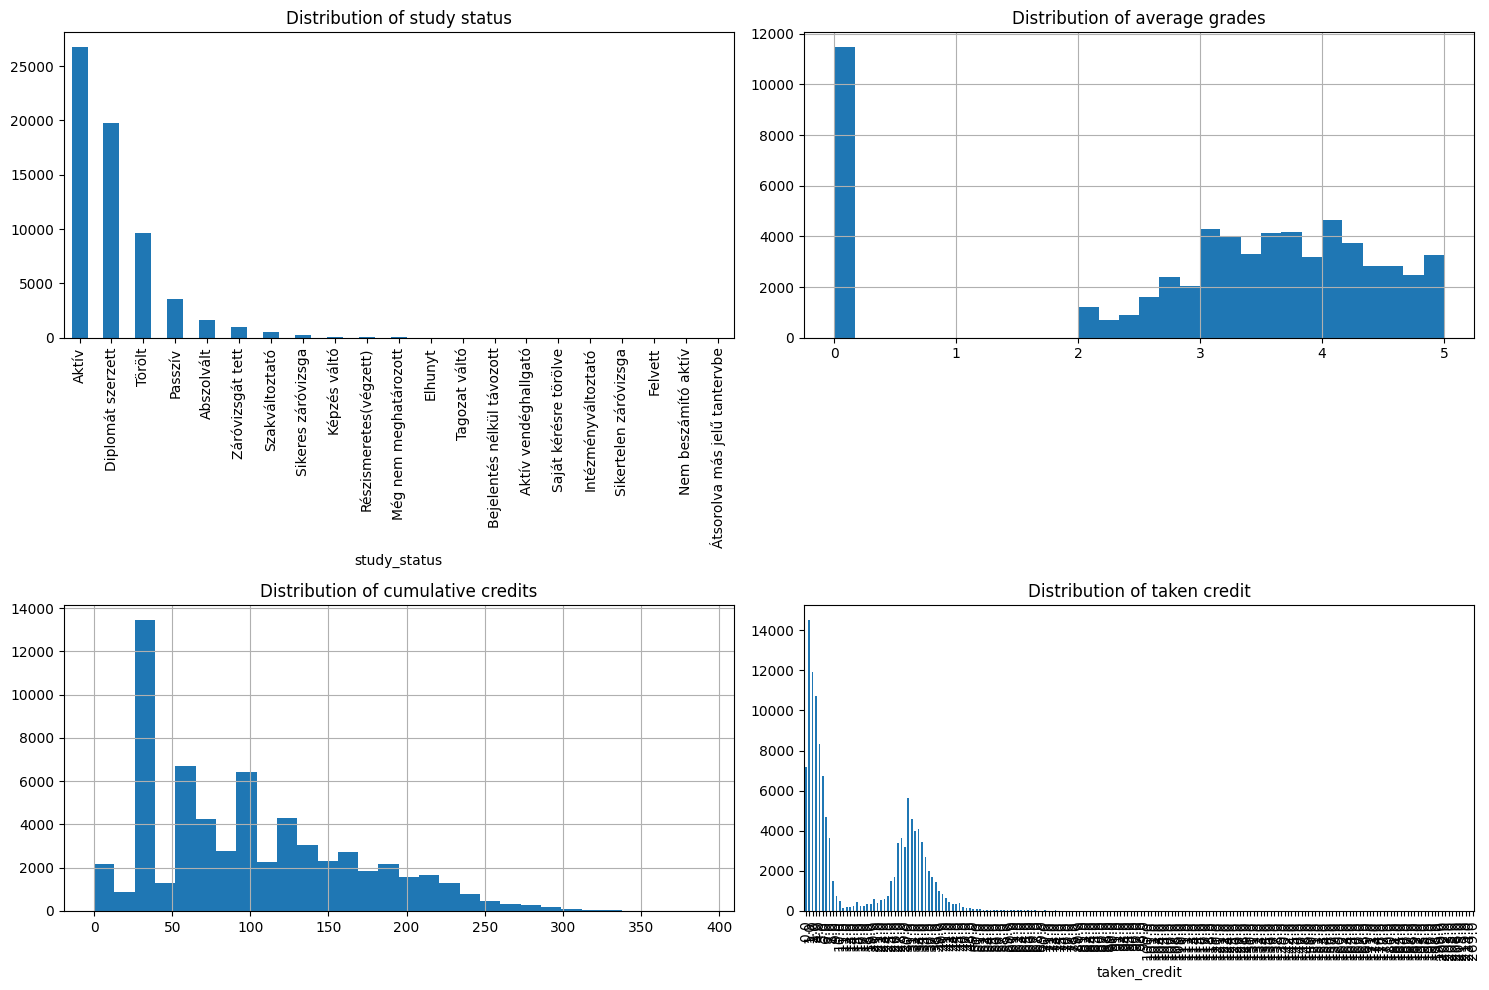

In [ ]:
# constant_cols = ['Key', 'modul_code', 'study_status',  'active_semesters', 'start_of_study', 'day_or_night', 'level_of_degree', 'sex', 'date_of_birth', 'post_code']
# study_df = df.groupby(['Key', 'modul_code', 'study_status',  'active_semesters']).first()[constant_cols[4:]].reset_index()

# print(len(study_df)) # 14369 "study" point
# # study_df.head(50)

# non_unique_keys_df = study_df[study_df['Key'].isin(study_df['Key'][study_df['Key'].duplicated(keep=False)])]
# print(f"people who did more then one study: {len(non_unique_keys_df)}")
# print(non_unique_keys_df.sort_values(by='Key').head(10))

# print(f"student with most studies: {study_df['Key'].value_counts().idxmax()} with {study_df['Key'].value_counts().max()} rows")
# print(study_df[study_df["Key"]==study_df['Key'].value_counts().idxmax()])

14583
people who did more then one study: 3121
    Key modul_code       study_status  active_semesters start_of_study day_or_night        level_of_degree    sex date_of_birth post_code
4     5   2BNGINFB              Aktív            1.0000     2013.09.04      Nappali    alapképzés (BA/BSc)  Férfi    1992-06-01      1158
5     5   2BNGINFB             Törölt            2.0000     2012.09.03      Nappali    alapképzés (BA/BSc)  Férfi    1992-06-01      1158
12   12    7BNNEMZ  Diplomát szerzett            6.0000     2008.09.10      Nappali    alapképzés (BA/BSc)  Férfi    1988-10-01      1092
13   12    7MNNEMZ              Aktív            5.0000     2011.08.29      Nappali  mesterképzés (MA/MSc)  Férfi    1988-10-01      1092
41   40   2BNGINFB              Aktív            1.0000     2013.09.02      Nappali    alapképzés (BA/BSc)  Férfi    1994-01-01      1037
42   40    2BNPSZV              Aktív            3.0000     2012.09.04      Nappali    alapképzés (BA/BSc)  Férfi    1994-01-